### Red neuronal de una capa

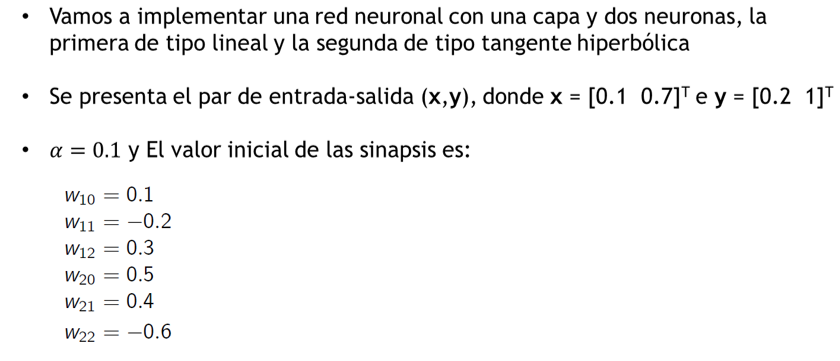

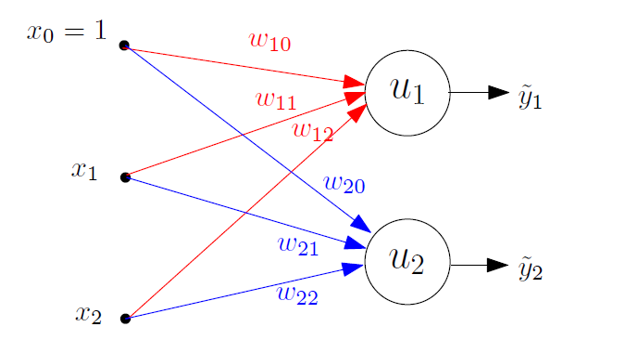

In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

Inicializa las entradas, el learning rate y los valores de las sinapsis

In [3]:
x0=1
x1=0.1
x2=0.7

y1=0.2
y2=1

w10=0.1
w11=-0.2
w12=0.3

w20=0.5
w21=0.4
w22=-0.6

alpha = 0.1

Para 100 pasos de entrenamiento:   

1) Calcula los valores $u_1$, $u_2$  
2) Calcula los valores $\hat{y}_1$ e $\hat{y}_2$  
3) Calcula los errores $\epsilon_1$ e $\epsilon_2$  y almacena el error cuadrático medio  
4) Calcula los errores retropropagados $\delta_1$ y $\delta_2$  
5) Calcula el nuevo valor de las sinapsis $w_{ij} \rightarrow w_{ij}+\Delta w_{ij}$

In [4]:
ecm = []
for k in range(100):
    u1 = w10 + w11*x1 + w12*x2
    u2 = w20 + w21*x1 + w22*x2

    yt1 = u1
    yt2 = math.tanh(u2)

    epsilon1 = y1 - yt1
    epsilon2 = y2 - yt2

    error = np.mean([epsilon1**2,epsilon2**2])
    ecm.append(error)

    delta1 = epsilon1
    delta2 = epsilon2 * (1-yt2**2)

    w10 = w10 + 2*alpha * x0 * delta1
    w11 = w11 + 2*alpha * x1 * delta1 
    w12 = w12 + 2*alpha * x2 * delta1
    w20 = w20 + 2*alpha * x0 * delta2
    w21 = w21 + 2*alpha * x1 * delta2
    w22 = w22 + 2*alpha * x2 * delta2

Haz un plot con la evolución del error cuadrático medio

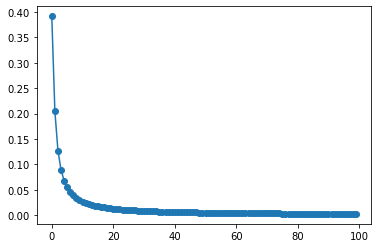

In [6]:
plt.plot(ecm,'-o')

### Ejemplo de una red neuronal de 2 capas

Se quiere utilizar una red neuronal para predecir el precio de unas casas. Las variables de entrada de las que se disponen son las siguientes:  
- x1: Número de habitaciones  
- x2: Distancia al centro (en km)  
- x3: Superficie (en m2/100)  

De momento, solo se dispone de una casa para entrenar la red neuronal. Esta casa tiene 2 habitaciones, 1.2km de distancia al centro y 220 m2 (x3 = 2.2). Su precio es de 1.213 millones de euros (lo sé, un poco cara).

**SE PIDE**: Implementar una red neuronal con dos capas. La primera capa contiene dos neuronas de tipo tangente hiperbólica, mientras que la segunda capa contiene una única neurona de tipo lineal.  


Implementa un código para entrenar la red y obtener los valores finales de las sinapsis tras 10 pasos de entrenamiento.   

* Utiliza la siguiente nomenclatura: 
    * xi para las variables de entrada
    * wij para las sinapsis que van de la entrada a la primera capa
    * tij para las sinapsis que van de la primera a la segunda capa
    * ui para las entradas de las neuronas
    * zi para las salidas de las neuronas de la primera capa
    * yt para la salida de la red  
    
* Otorga un valor aleatorio inicial a cada una de las sinapsis con la función `np.random.normal(0.5)`  

* Utiliza un learning rate de 0.1

Asegúrate de que la función de error decrece tras cada paso de entrenamiento. Imprime por pantalla el valor de salida de la red tras el entrenamiento.

1.213


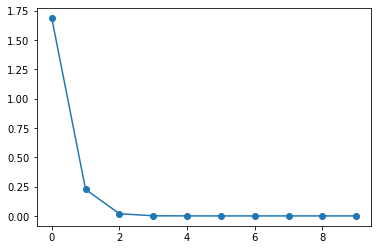

In [3]:
x0 = 1
x1 = 2
x2 = 1.2
x3 = 2.2

y = 1.213
t0 = 1

alpha = 0.1

w10 = np.random.normal(0.5)
w11 = np.random.normal(0.5)
w12 = np.random.normal(0.5)
w13 = np.random.normal(0.5)

w20 = np.random.normal(0.5)
w21 = np.random.normal(0.5)
w22 = np.random.normal(0.5)
w23 = np.random.normal(0.5)

t30 = np.random.normal(0.5)
t31 = np.random.normal(0.5)
t32 = np.random.normal(0.5)

ecm = []

for k in range(10):
  
  u1 = x0*w10 + x1*w11 + x2*w12 + x3*w13
  u2 = x0*w20 + x1*w21 + x2*w22 + x3*w23
  
  z1 = math.tanh(u1)
  z2 = math.tanh(u2)
  
  u3 = t30 + t31*z1 + t32*z2 
  yt = u3
  
  epsilon1 = y-yt
  
  ecm.append(epsilon1**2)
  
  delta3 = epsilon1
  t30 = t30 + 2*alpha*delta3
  t31 = t31 + 2*alpha*z1*delta3
  t32 = t32 + 2*alpha*z2*delta3
  
  gamma1 = (1-z1**2)*delta3*t31
  gamma2 = (1-z2**2)*delta3*t32
  
  w10 = w10 + 2*alpha*x0*gamma1
  w11 = w11 + 2*alpha*x1*gamma1
  w12 = w12 + 2*alpha*x2*gamma1
  
  w20 = w20 + 2*alpha*x0*gamma2
  w21 = w21 + 2*alpha*x1*gamma2
  w22 = w22 + 2*alpha*x2*gamma2


plt.plot(ecm,'-o')
print(y)

Utilizando la red neuronal anterior, predice el precio de una casa de 3 habitaciones, 2.1km de distancia al centro y 120 m2.

In [8]:
x0 = 1
x1 = 3
x2 = 2.1
x3 = 1.2

u1 = x0 * w10 + x1*w11 + x2*w12 + x3*w13
u2 = x0 * w20 + x1*w21 + x2*w22 + x3*w23

z1 = math.tanh(u1)
z2 = math.tanh(u2)

u3 = t30 + z1*t31 + z2*t32
yt = u3

yt

1.6867120073565336

### Multilayer Perceptron (sklearn)

In [15]:
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

Utilizaremos el dataset de Boston para regresión y uno de pingüinos para clasificación

#### Clasificación

In [8]:
import seaborn as sns

In [9]:
df = sns.load_dataset("penguins")

# Limpiamos un poco los datos
df.dropna(inplace=True)
cleanup_nums = {"species": {"Adelie": 0,
                            "Chinstrap": 1,
                            "Gentoo": 2},
               "sex": {"Male": 0,
                       "Female": 1}}

df.replace(cleanup_nums, inplace=True)
df = pd.get_dummies(df)

df.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,island_Biscoe,island_Dream,island_Torgersen
0,0,39.1,18.7,181.0,3750.0,0,0,0,1
1,0,39.5,17.4,186.0,3800.0,1,0,0,1
2,0,40.3,18.0,195.0,3250.0,1,0,0,1
4,0,36.7,19.3,193.0,3450.0,1,0,0,1
5,0,39.3,20.6,190.0,3650.0,0,0,0,1


In [10]:
# División train-test

from sklearn.model_selection import train_test_split

X = df.iloc[:, 1:]
y = df.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [11]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(266, 8)
(67, 8)
(266,)
(67,)


In [13]:
mlp = MLPClassifier(max_iter=500,
                    activation='tanh',
                    hidden_layer_sizes = (10,)
                   )
mlp.fit(X_train, y_train)
mlp.score(X_test,y_test)

0.4626865671641791

In [14]:
mlp.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0], dtype=int64)

In [15]:
mlp.predict_proba(X_test)

array([[0.42877834, 0.20163744, 0.36958423],
       [0.42877834, 0.20163744, 0.36958423],
       [0.42877834, 0.20163744, 0.36958423],
       [0.42877834, 0.20163744, 0.36958423],
       [0.42877834, 0.20163744, 0.36958423],
       [0.42877834, 0.20163744, 0.36958423],
       [0.42877834, 0.20163744, 0.36958423],
       [0.42877834, 0.20163744, 0.36958423],
       [0.42877834, 0.20163744, 0.36958423],
       [0.42877834, 0.20163744, 0.36958423],
       [0.42877834, 0.20163744, 0.36958423],
       [0.42877834, 0.20163744, 0.36958423],
       [0.42877834, 0.20163744, 0.36958423],
       [0.42877834, 0.20163744, 0.36958423],
       [0.42877834, 0.20163744, 0.36958423],
       [0.42877834, 0.20163744, 0.36958423],
       [0.42877834, 0.20163744, 0.36958423],
       [0.42877834, 0.20163744, 0.36958423],
       [0.42877834, 0.20163744, 0.36958423],
       [0.42877834, 0.20163744, 0.36958423],
       [0.42877834, 0.20163744, 0.36958423],
       [0.42877834, 0.20163744, 0.36958423],
       [0.

Probemos con una regresión logística

In [16]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.9850746268656716

![img](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRQ_-ZuNGjNonExIDJ4smm-ESuodaVEyCt706FSnKXw55FVk1PiTa-Dp8hsW_RbrHD3rdA&usqp=CAU)

Escalar los datos es fundamental a la hora de entrenar redes neuronales

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scal = scaler.transform(X_train)
X_test_scal = scaler.transform(X_test)

In [22]:
mlp = MLPClassifier(max_iter=500,
                   activation='tanh',
                   hidden_layer_sizes=(5,))

mlp.fit(X_train_scal, y_train)
mlp.score(X_test_scal, y_test)

C:\Users\rzambrano\Anaconda3\envs\general\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


1.0

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,mlp.predict(X_test_scal)))
confusion_matrix(y_test,mlp.predict(X_test_scal))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



array([[31,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 23]], dtype=int64)

#### Regresión

In [9]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()
df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
df['MEDV'] = boston_dataset.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
from sklearn.model_selection import train_test_split
X = df.loc[:, df.columns != 'MEDV']
y = df.loc[:, df.columns == 'MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [11]:
X_train.shape,y_train.shape

((354, 13), (354, 1))

In [13]:
from sklearn.preprocessing import StandardScaler
# Escalar X e y
x_scaled = StandardScaler()
y_scaled = StandardScaler()

x = x_scaled.fit_transform(X_train)
y = y_scaled.fit_transform(y_train)

In [16]:
mlp2 = MLPRegressor(max_iter=500,
                    hidden_layer_sizes=(10,),
                    activation='tanh'
                   )

mlp2.fit(x,y.ravel())

MLPRegressor(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(10,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=500,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [17]:
# Predecir en train y desnormalizar
pred_train = mlp2.predict(x)
pred_train2 = y_scaled.inverse_transform(pred_train)
pred_train2

array([32.52387502, 27.01046548, 28.3431564 , 17.46205848, 13.99163955,
       34.15848872, 30.97750388, 19.71796179, 18.89012553, 29.77537968,
       37.82949544,  7.85874946, 12.46162185, 45.06864301, 17.89860335,
       35.19689291, 21.64743052, 12.82452838, 32.5307541 , 23.57016766,
       26.74688351, 30.71315994, 44.37355095, 32.85255876, 20.83873296,
       32.85767474, 17.55997997, 24.52963011, 30.17375535, 23.29884794,
       35.22817135, 23.93681763, 21.89709517, 34.60019752, 34.3358956 ,
       21.94719783, 32.86151071, 23.99317121, 26.68816935, 18.01822036,
       14.12215459, 24.50345768, 11.56787245, 12.75598019, 10.34615435,
       24.10294805, 36.73382622, 24.11820095, 25.1424261 , 19.31376558,
       17.76274011, 12.24080326, 19.06798649, 29.57425648, 26.54726928,
       16.72791272, 10.51733437, 37.30162582, 22.16575449, 16.91839153,
       19.26477605, 19.57469111, 15.96477932, 33.33431034, 18.93886127,
       18.72255481, 19.01358757, 25.26549375, 20.64774802, 16.24

In [18]:
pred_test = mlp2.predict(x_scaled.transform(X_test))
pred_test2 = y_scaled.inverse_transform(pred_test)
pred_test2

array([15.0154646 , 28.33920095, 42.24962736, 17.66432893, 30.42722417,
       36.22246348, 26.19976842, 11.19018988, 17.4273816 , 30.49224667,
       26.28301507, 18.40050103, 14.72203078, 32.26264289, 17.28105594,
       20.29042792, 20.70029481, 38.64549524, 17.32523694, 15.03098398,
       16.81487952, 25.393303  , 34.23565333, 39.27956085, 32.11517976,
       23.80601564, 16.94091218, 19.28557823, 20.75031386, 24.39655044,
       26.62149973, 35.89572615, 12.55124888, 22.05923113, 23.95780445,
       33.71390895, 29.31132127, 15.74371909, 13.39443556, 41.30404469,
       31.50483653, 16.79042269, 20.45360844, 43.34846801, 12.62637949,
       25.33051545, 18.23678307, 25.3444297 , 13.6363939 , 23.17653464,
       33.90668658, 25.19120035, 18.63306658, 12.55979808, 21.47263134,
       17.64971269, 12.99990458, 10.00974641, 32.33925491, 13.41220345,
       19.00678108, 20.52625172, 21.88499451, 17.02831318, 24.2827247 ,
       25.26696947, 24.82345181, 21.63240184, 23.31768737, 30.49

In [19]:
# Medimos desempeño 
from sklearn.metrics import mean_squared_error, r2_score
mse_1 = mean_squared_error(pred_train2,y_train)
r2_1 = r2_score(pred_train2,y_train)
print ("Train ERROR = ", mse_1)
print ("Train R2 = ", r2_1)

mse_2 = mean_squared_error(pred_test2,y_test)
r2_2 = r2_score(pred_test2,y_test)
print ("Test ERROR = ", mse_2)
print ("Test R2 = ", r2_2)

Train ERROR =  13.46120570605256
Train R2 =  0.8037829215135718
Test ERROR =  20.332358291711934
Test R2 =  0.6638747176474057


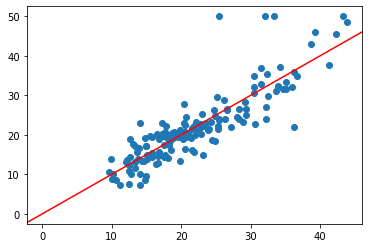

In [20]:
fig, ax = plt.subplots()
plt.plot(pred_test2,y_test,'o')
plt.axline([0,0],[1,1],color='red')

Intentemos mejorar el desempeño con GridSearchCV

In [22]:
from sklearn.model_selection import GridSearchCV

mlp3 = MLPRegressor()

parameters = {
    'max_iter':[100,200,500],
    'hidden_layer_sizes':[(20,), (30), (20,20), (30,15), (100,100)],
    'activation':['tanh','relu'],
    'solver':['sgd','adam'],
    'alpha':[0.0001,0.05]
}

clf = GridSearchCV(mlp3, parameters,n_jobs =-1, cv=10)
clf.fit(x,y.ravel())

C:\Users\rzambrano\Anaconda3\envs\general\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=10, error_score=nan,
             estimator=MLPRegressor(activation='relu', alpha=0.0001,
                                    batch_size='auto', beta_1=0.9, beta_2=0.999,
                                    early_stopping=False, epsilon=1e-08,
                                    hidden_layer_sizes=(100,),
                                    learning_rate='constant',
                                    learning_rate_init=0.001, max_fun=15000,
                                    max_iter=200, momentum=0.9,
                                    n_iter_no_change=10,
                                    nesterovs_momentum=True, power_t=0.5,
                                    random_state...
                                    solver='adam', tol=0.0001,
                                    validation_fraction=0.1, verbose=False,
                                    warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu']

In [23]:
# Mejores parámetros
clf.best_params_

{'activation': 'relu',
 'alpha': 0.0001,
 'hidden_layer_sizes': (100, 100),
 'max_iter': 200,
 'solver': 'adam'}

In [27]:
pred_test = clf.predict(x_scaled.transform(X_test))
pred_test2 = y_scaled.inverse_transform(pred_test)

In [28]:
# Medimos desempeño 
from sklearn.metrics import mean_squared_error, r2_score
mse_1 = mean_squared_error(pred_train2,y_train)
r2_1 = r2_score(pred_train2,y_train)
print ("Train ERROR = ", mse_1)
print ("Train R2 = ", r2_1)

mse_2 = mean_squared_error(pred_test2,y_test)
r2_2 = r2_score(pred_test2,y_test)
print ("Test ERROR = ", mse_2)
print ("Test R2 = ", r2_2)

Train ERROR =  13.46120570605256
Train R2 =  0.8037829215135718
Test ERROR =  12.919859154275159
Test R2 =  0.815801176684271


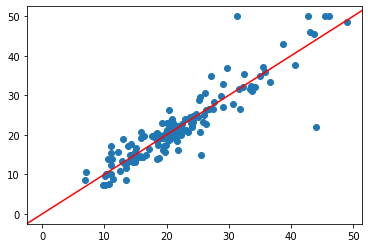

In [29]:
fig, ax = plt.subplots()
plt.plot(pred_test2,y_test,'o')
plt.axline([0,0],[1,1],color='red')